<a href="https://colab.research.google.com/github/MissAzie/Machine-Learning-Projects/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras._tf_keras.keras import layers
from keras.layers import LSTM, Dense, Dropout

data = pd.read_csv('Final.csv')
data

#columns for energy consumption
energy_data = data.loc[:, '1Hour':'24Hour']

# Data Normalization (scale between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(energy_data.values)

# Sequence length
seq_length = 24  # the past 24hours is used to predict the next

#sequences for LSTM
def create_sequences(data, seq_lenght):
  x, y = [], []
  for i in range(len(data) - seq_length):
    x.append(data[i:i+seq_lenght])
    y.append(data[i+seq_length]) # Next hour's values
  return np.array(x), np.array(y)

x, y = create_sequences(scaled_data, seq_length)

# spliting data into training and testing sets
train_size =int(len(x)*0.8)
x_train, x_test = x[:train_size],x[train_size:]
y_train, y_test = y[:train_size],y[train_size:]

print(f"x_train shape: {x_train.shape}, y_train shape:{y_train.shape}")
print(f"x_train shape: {x_test.shape}, y_test shape:{y_test.shape}")

# Building LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, x_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(y_train.shape[1]) #output layer matches number of targets (24 hours)
])

model.compile(optimizer='adam', loss='mean_squared_error')

#training the model
history = model.fit(x_train,y_train, epochs=20, batch_size = 32,
                    validation_data=(x_test,y_test))

# Evaluate the model
predicted = model.predict(x_test)

# Reverse scaling for actual values
predicted_unscaled = scaler.inverse_transform(predicted)
y_test_unscaled = scaler.inverse_transform(y_test)

# ploting predictions vs actual values
plt.figure(figsize=(12,6))
plt.plot(y_test_unscaled [0], label = 'Actual', marker = 'o')
plt.plot(predicted_unscaled[0], label = 'Predicted', marker = 'x')
plt.title('Prediction vs Actual (First Test Sample)')
plt.legend()
plt.show()

# Saving the model
model.save('lstm_energy_model.h5')
print("Model saved as lstm_energy_model.h5")

Dataset with Date Index:
   Category  Contract Number  Meter Number  Contract Type Code  Contract Type  \
0         1             1154            31                 322              0   
1         1             1154            31                 322              0   
2         1             1154            31                 322              0   
3         1             1154            31                 322              0   
4         1             1154            31                 322              0   

   Industry Classification Code  Industry Classification (2nd level)  \
0                         52919                                    0   
1                         52919                                    0   
2                         52919                                    0   
3                         52919                                    0   
4                         52919                                    0   

        Date  1Hour  2Hour  ...  17Hour  18Hour  19Hour

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


677/677 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - loss: 0.0092 - val_loss: nan
Epoch 2/20
677/677 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - loss: 0.0046 - val_loss: nan
Epoch 3/20
677/677 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - loss: 0.0036 - val_loss: nan
Epoch 4/20
677/677 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - loss: 0.0029 - val_loss: nan
Epoch 5/20
677/677 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - loss: 0.0027 - val_loss: nan
Epoch 6/20
677/677 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - loss: 0.0027 - val_loss: nan
Epoch 7/20
677/677 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - loss: 0.0025 - val_loss: nan
Epoch 8/20
677/677 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - loss: 0.0024 - val_loss: nan
Epoch 9/20
677/677 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - loss: 0.0024 - val_loss: nan
Epoch 10/20
677/677 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - loss: 0.0024 - val_loss: nan
Epoch 11/20
677/677 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - loss: 0.0022 - val_loss: nan
Epoch 12/20
677/677 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - loss: 0.0024 - va

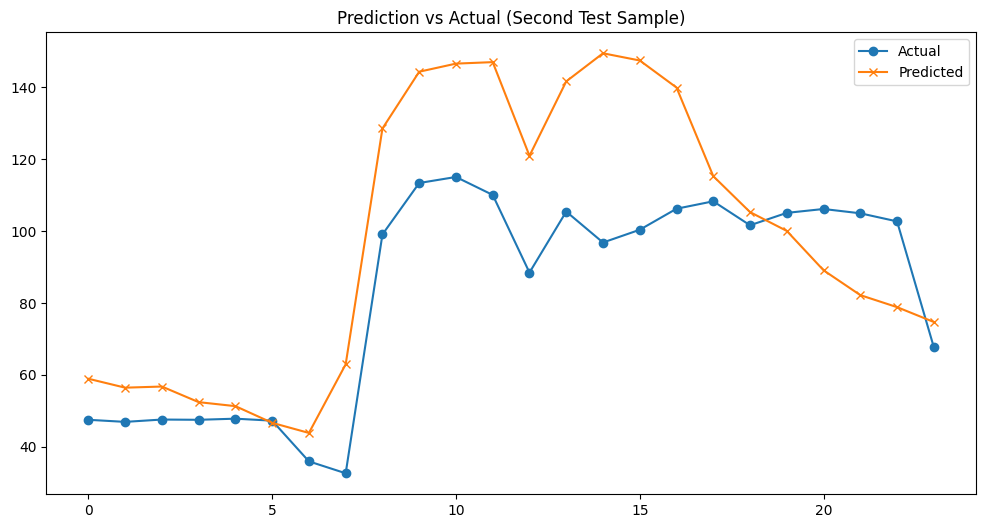

Model saved as lstm_energy_model.h6


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras._tf_keras.keras import layers
from keras.layers import LSTM, Dense, Dropout

# preview
data = pd.read_csv('modified.csv')
data

print("Dataset with Date Index:")
print(data.head())

#columns for energy consumption
energy_data = data.loc[:, '1Hour':'24Hour']

# Data Normalization (scale between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(energy_data.values)

# Sequence length
seq_length = 24  # the past 24hours is used to predict the next

#sequences for LSTM
def create_sequences(data, seq_lenght):
  x, y = [], []
  for i in range(len(data) - seq_length):
    x.append(data[i:i+seq_lenght])
    y.append(data[i+seq_length]) # Next hour's values
  return np.array(x), np.array(y)

x, y = create_sequences(scaled_data, seq_length)

# spliting data into training and testing sets
train_size =int(len(x)*0.8)
x_train, x_test = x[:train_size],x[train_size:]
y_train, y_test = y[:train_size],y[train_size:]

print(f"x_train shape: {x_train.shape}, y_train shape:{y_train.shape}")
print(f"x_train shape: {x_test.shape}, y_test shape:{y_test.shape}")

# Building LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, x_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(y_train.shape[1]) #output layer matches number of targets (24 hours)
])

model.compile(optimizer='adam', loss='mean_squared_error')

#training the model
history = model.fit(x_train,y_train, epochs=20, batch_size = 32,
                    validation_data=(x_test,y_test))

# Evaluate the model
predicted = model.predict(x_test)

# Reverse scaling for actual values
predicted_unscaled = scaler.inverse_transform(predicted)
y_test_unscaled = scaler.inverse_transform(y_test)

# ploting predictions vs actual values
plt.figure(figsize=(12,6))
plt.plot(y_test_unscaled [0], label = 'Actual', marker = 'o')
plt.plot(predicted_unscaled[0], label = 'Predicted', marker = 'x')
plt.title('Prediction vs Actual (Second Test Sample)')
plt.legend()
plt.show()

# Saving the model
model.save('lstm_energy_model.h5')
print("Model saved as lstm_energy_model.h6")